# Trabalho 1 - Cálculo Numérico

Artur De Vlieger Lima (13671574)

Gabriel da Costa Merlin (12544420)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

## Exercício 1

Ao olhar para esse exercício, a primeira coisa que nos deparamos foram duas funções que utilizavam  a decomposição LU, mas com uma pequena diferença, a func2 apresentava um fator que restringia o número de posições calculadas em L e U, que se dá pela variável v, e isso por algum motivo estava tornando a func2 muito mais rápida sem alterar o resultado, enquanto a func 1 levava 20 segundos, a func2 levava menos de 1.

In [2]:
def func1(A):

  # Inicialização das matrizes.
  n = A.shape[0]
  U = A.copy()
  L = np.eye(n)

  # Iterando sobre os elementos descritos pela decomposição LU.
  for j in range(n-1):
    for i in range(j+1,n):
      L[i,j] = U[i,j] / U[j,j]
      U[i,j:n] = U[i,j:n] - L[i,j] * U[j,j:n]

  return (L, U)

def func2(A, p):

  # Inicialização das matrizes.
  n = A.shape[0]
  U = A.copy( )
  L = np.eye(n)

  # Iterando sobre os elementos descritos pela decomposição LU, exceto
  # em algumas diagonais (que possuem apenas 0).
  for j in range(n-1):
    v = min(n,j+p+1)
    for i in range (j+1,v):
      L[i,j] = U[i,j] / U[j,j]
      U[i,j:v] = U[i,j:v] - L[i,j] * U[j,j:v]

  return(L,U)

# Exemplo
n = 2000
p = 2
A = np.zeros((n,n))

for i in range(n):
  for j in range(max(0,i-p),min(n,i+p+1)):
    A[i,j] = np.random.normal()

# Cálculo usando a func1.
start_time = time.time()
(L, U) = func1(A)
end_time = time.time()
print(end_time - start_time)

# Cálculo usando a func2.
start_time = time.time()
(L_, U_) = func2(A,p)
end_time = time.time()
print(end_time - start_time)

# Printando os "erros" de ambos os métodos.
print(np.linalg.norm(L @ U - A))
print(np.linalg.norm(L_ @ U_ - A))

23.613938093185425
0.033391714096069336
2.8588221205887116e-13
2.8588221205887116e-13


Investigando um pouco mais, descobrimos que essa variável v dependia de outra variável, p, declarada no código de exemplo como 2.

O valor desse p traz duas implicações para o código:

- Quantas diagonais serão calculadas para L e U em func 2

- E mais importante, quantas diagonais em A acima e abaixo da diagonal principal, a matriz que queremos decompor, possuem valores diferentes de 0

Abaixo tem um exemplo de como seria um A 4 x 4 com p = 1 (trocamos os valores aleatórios por 1 para facilitar a visualização)

In [3]:
# Função para printar uma matriz.
def print_matriz(matriz):
    for linha in matriz:
        for item in linha:
            print(item, end="       ")
        print()
n = 4
p = 1
A = np.zeros((n,n))

# Função dada pelo exercício para gerar o A com uma troca do rand por 1.
for i in range(n):
  for j in range(max(0,i-p),min(n,i+p+1)):
    A[i,j] = 1
print_matriz(A)

1.0       1.0       0.0       0.0       
1.0       1.0       1.0       0.0       
0.0       1.0       1.0       1.0       
0.0       0.0       1.0       1.0       


Note que apenas nas colunas e linhas um abaixo e um acima de cada elemento da diagonal principal possuem valor, pois setamos p = 1, se fosse 2 seriam 2 colunas e linhas acima, e assim por diante.

Com isso, entendemos que a func 2, ao limitar os elementos que percorria com a variável v, estava na verdade não calculando nada para os posições que já eram 0 na matriz original, e por isso conseguiu ser muito mais rápida e manter o resultado, um truque esperto para problemas em que a matriz possui "triângulos" de zeros simétricos.

Ou seja, enquanto a func 1 se trata de uma LU normal, a func 2 é uma LU otimizada para esse tipo de problema.

## Exercício 2

In [4]:
A = np.array([[4, -2, 1, 0, 0, 0],
              [-2, 7, -2, 1, 0, 0],
              [1, -2, 7, -2, 1, 0],
              [0, 1, -2, 7, -2, 1],
              [0, 0, 1, -2, 7, -2],
              [0, 0, 0, 1, -2, 4]])
b = np.array([-1, 2, 1, 1, -2, -1])
n = A.shape[0]

### a)

A forma matricial de Gauss Jacobi escreve a expressão

$$
\mathbf{X}^{k+1} = \mathbf{C} \cdot \mathbf{X}^{k} + \mathbf{g}
$$

como

$$
\mathbf{X}^{k+1} = (\mathbf{I} - \mathbf{D}^{-1} \cdot \mathbf{A}) \cdot \mathbf{X}^{k} + \mathbf{D}^{-1} \cdot \mathbf{b}
$$

portanto

$$
\mathbf{C}_{j} = \mathbf{I} - \mathbf{D}^{-1} \cdot \mathbf{A}
$$

$$
\mathbf{g}_{j} = \mathbf{D}^{-1} \cdot \mathbf{b}
$$

In [5]:
# Calculando Cj e gj.

I = np.eye(n)
D = np.diag(np.diag(A))
D_inv = np.linalg.inv(D)

C_j = I - D_inv @ A
g_j = D_inv @ b

print(C_j)
print('\n')
print(g_j)

[[ 0.          0.5        -0.25        0.          0.          0.        ]
 [ 0.28571429  0.          0.28571429 -0.14285714  0.          0.        ]
 [-0.14285714  0.28571429  0.          0.28571429 -0.14285714  0.        ]
 [ 0.         -0.14285714  0.28571429  0.          0.28571429 -0.14285714]
 [ 0.          0.         -0.14285714  0.28571429  0.          0.28571429]
 [ 0.          0.          0.         -0.25        0.5         0.        ]]


[-0.25        0.28571429  0.14285714  0.14285714 -0.28571429 -0.25      ]


Já o método de Gauss-Siedel tem sua forma matricial escrita como


$$
\mathbf{X}^{k+1} = (- \mathbf{L}^{-1} \cdot \mathbf{R}) \cdot \mathbf{X}^{k} + \mathbf{L}^{-1} \cdot \mathbf{b}
$$

portanto

$$
\mathbf{C}_{gs} = - \mathbf{L}^{-1} \cdot \mathbf{R}
$$

$$
\mathbf{g}_{gs} = \mathbf{L}^{-1} \cdot \mathbf{b}
$$

In [6]:
# Calculando Cgs e ggs

L = np.tril(A)
R = np.triu(A, 1)
L_inv = np.linalg.inv(L)

C_gs = - L_inv @ R
g_gs = L_inv @ b

print(C_gs)
print('\n')
print(g_gs)

[[ 0.          0.5        -0.25        0.          0.          0.        ]
 [ 0.          0.14285714  0.21428571 -0.14285714  0.          0.        ]
 [ 0.         -0.03061224  0.09693878  0.24489796 -0.14285714  0.        ]
 [ 0.         -0.02915452 -0.00291545  0.09037901  0.24489796 -0.14285714]
 [ 0.         -0.00395668 -0.01468138 -0.00916285  0.09037901  0.24489796]
 [ 0.          0.00531029 -0.00661183 -0.02717618 -0.01603499  0.15816327]]


[-0.25        0.21428571  0.23979592  0.18075802 -0.2683257  -0.42935235]


### b)

Para ter certeza que Gauss-Jacobi converge, ele deve passar ou no Critério das Linhas ou no Critério das colunas, caso contrário, não podemos afirmar nada sobre sua convergência.

Da mesma forma, se quisermos ter certeza que o Gauss-Siedel converge, ele deve passar no Critério de Sassenfield, caso contrário, não podemos afirmar nada sobre.

In [7]:
# Função para calcular o Critério das Linhas.
def crit_linhas(A):
  maior_valor = 0

  for i in range(n):
    soma = 0

    for j in range(n):

      if i != j:
        soma += abs(A[i,j])

    valor_linha = soma / abs(A[i,i])
    maior_valor = max(maior_valor, valor_linha)

    if maior_valor < 1:
      return True
    else:
      return False

# Função para calcular o Critério de Sassenfield.
def crit_sassenfield(A):
  betas = []

  for i in range(n):
    b = 0

    for j in range(n):

      if (i != j and i==0) or i < j:
        b += A[i,j]
      elif i != j and i != 0:
        b += A[i,j] * betas[j]

    b /= A[i,i]
    betas.append(b)

  if max(betas) < 1:
    return True
  else:
    return False

# Calculando os critérios.
crit_linhas(A), crit_sassenfield(A)

(True, True)

Como podemos ver pelo código acima, os Critérios da Linha e de Sassenfield são satisfeitos para os Métodos de Gauss-Jacobi e Gauss-Siedel repectivamente. Logo, ambos os métodos convergem.

### c)

In [8]:
# Função para calcular o resultado do método de Gauss-Jacobi
def gauss_jacobi(A, b, x0, tol):
    n = A.shape[0]
    D = np.diag(np.diag(A))
    C = np.eye(n) - np.linalg.inv(D) @ A
    g = np.linalg.inv(D) @ b
    errors = []
    kmax = 10000
    k = 0

    erro = np.linalg.norm(b - A @ x0)
    errors.append(erro)

    while erro > tol and k < kmax:
        k += 1
        x0 = C @ x0 + g

        erro = np.linalg.norm(b - A @ x0)
        errors.append(erro)
    if k == kmax:
        print('Erro: o metodo nao converge.')
        return None, None, None

    return x0, k, errors

# Função para calcular o resultado do método de Gauss-Siedel.
def gauss_seidel(A, b, x0, tol):
    L = np.tril(A)
    R = np.triu(A, 1)
    C = -np.linalg.inv(L) @ R
    g = np.linalg.inv(L) @ b
    errors = []
    kmax = 10000
    k = 0

    erro = np.linalg.norm(b - A @ x0)
    errors.append(erro)

    while erro > tol and k < kmax:
        k += 1
        x0 = C @ x0 + g

        erro = np.linalg.norm(b - A @ x0)
        errors.append(erro)
    if k == kmax:
        print('Erro: o metodo nao converge.')
        return None, None, None

    return x0, k, errors

# Função para criar o gráfico erroXiteração pedido.
def plot_erro(errors1, name1, errors2, name2):
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(errors1) + 1), errors1, marker='o', label=name1)
    plt.plot(range(1, len(errors2) + 1), errors2, marker='o', label=name2)
    plt.xlabel('Iteração')
    plt.ylabel('Erro')
    plt.title('Erro por Iteração')
    plt.grid(True)
    plt.legend()
    plt.show()

[ 2.82371579e-09  6.86740775e-10 -2.63486677e-10 -9.26955790e-10
  1.93124461e-10 -1.65387259e-10] 



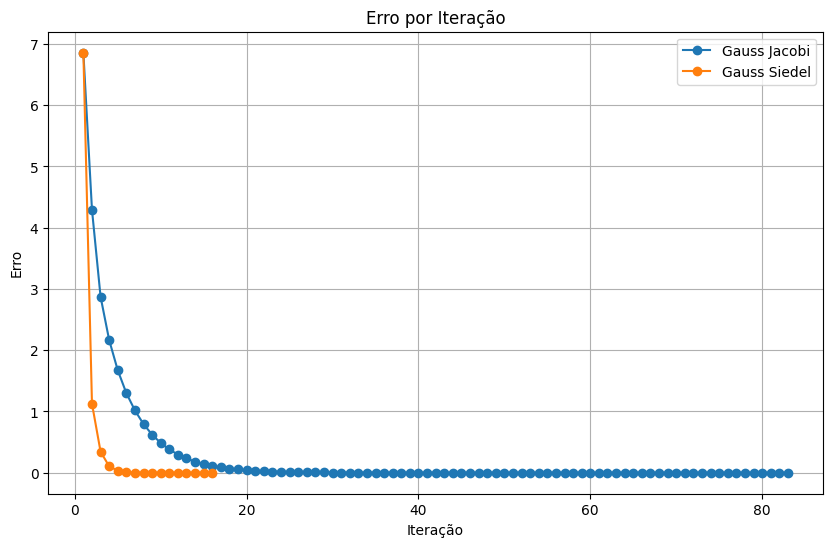

In [9]:
# Calculando os métodos e plotando o gráfico.

erro = 10 ** -8
x0 = [1,0,0,0,0,0]

res_gj, n_ite_gj, errors_gj = gauss_jacobi(A, b, x0, erro)
res_gs, n_ite_gs, errors_gs = gauss_seidel(A, b, x0, erro)

print(res_gj - res_gs, '\n')

plot_erro(errors_gj, 'Gauss Jacobi', errors_gs, 'Gauss Siedel')

Sabemos, por teoria, que o Método de Gauss Siedel é uma otimização do Gauss Jacobi. Algo que pode ser facilmente interpretado no gráfico acima, já que para um mesmo nível de tolerância Gauss-Siedel precisou de, aproximadamente, 1/5 das itereações. Além disso, podemos ver que em questão de resultado ambos são muito parecidos, já que a diferença entre os resultados finais de cada um é muito pequena, praticamente 0.

## Exercicio 3

### a)

Primeiramente, quanto a formulação do problema. Para modelarmos ele de modo que seja resolvível por uma função não linear, teremos que igualar as funções p(x) e q(x), e pegar a maior das raízes, assim obteremos o resultado.

$$
p(x) = q(x)
$$

$$
\leftrightarrow
$$

$$
- \mathbf{x}^{4} +7.7 \mathbf{x}^{3} - 18 \mathbf{x}^{2} + 13.6x  = - \mathbf{x}^{2} +5 x + 0.75
$$
Assim teremos no final uma função

$$
f(x) =  - \mathbf{x}^{4} +7.7 \mathbf{x}^{3} - 17 \mathbf{x}^{2} + 8.6x - 0.75 = 0
$$

Abaixo criamos no código a função f e a função p e o método da bisseção, pedido pelo exercício.

In [10]:
# Função f(x) = p(x) - q(x).
def f(x):
  return -x**4 + 7.7 * x**3 - 17*x*x + 8.6 * x -0.75

In [11]:
def p(x):
  return -x**4 + 7.7 * x**3 - 18*x*x + 13.6 * x

In [12]:
# Função para gerar os graficos de erro.
def plot_erro2(errors):
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(errors) + 1), errors, marker='o')
    plt.xlabel('Iteração')
    plt.ylabel('Erro')
    plt.title('Erro por Iteração')
    plt.grid(True)
    plt.show()

def bissecao(func, a, b, tol, maxIterations):

    # Chutamos o valor central dos nossos chutes iniciais.
    chute = (a+b)/2
    erro = np.inf
    iteration = 0
    erros = []

    # Continuamos tentanto até conseguir um número cujo erro é menor que a nossa tolerância ou atingirmos o maximo de iterações.
    while erro > tol and iteration < maxIterations:

        # Substituiremos pelo chute o valor com o mesmo sinal dele para nos mantermos válidos ao teorema do valor médio.
        if func(a) * func(chute) <= 0:
            b = chute
        else:
            a = chute

        chuteAux = chute
        chute = (a+b)/2

        # O erro ou a precisão se dará na diferença entre o chute que demos agora e o anterior.
        erro = abs(chute-chuteAux)
        erros.append(erro)
        iteration += 1

    plot_erro2(erros)
    return chute

Agora, basta escolhermos valores bons para os chutes iniciais e asim nos aproximarmos da raiz desejada. Observando o gráfico dado pelo exercício, escolhemos a como 3 e b como 3.4, pontos próximos da raiz que queremos que representa o ponto de impacto. Podemos ver a evolução do erro no gráfico gerado.

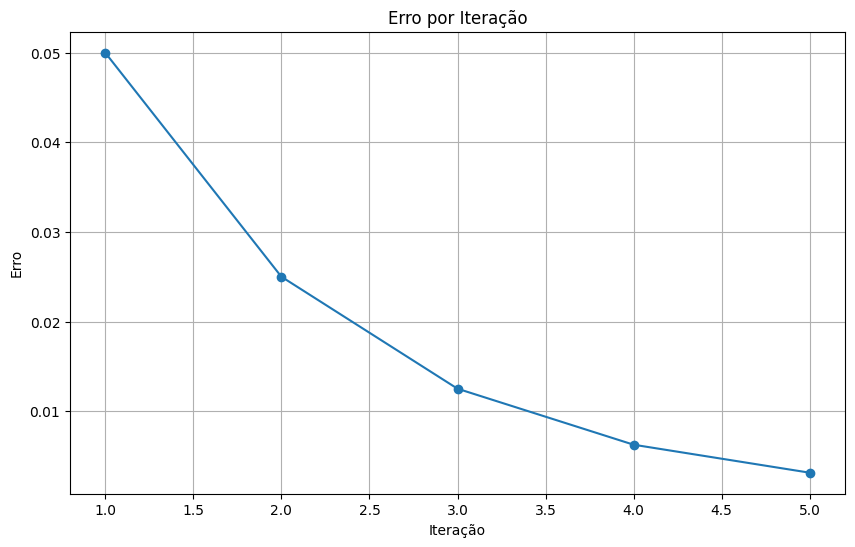


x aproximadh eh  3.171875
A altura aproxima eh  6.542846429347982


In [13]:
# Descobrindo o x aproximado pelo método.
x_aprox = bissecao(f, 3, 3.2, 0.001, 5)
print("\nx aproximadh eh ", x_aprox)

# Calculando a altura respectiva a ele.
y_aprox = p(x_aprox)
print("A altura aproxima eh ", y_aprox)

### b)

Agora, para resolvermos o problema usando o método de Newton para sistemas, assim ao invés de juntarmos as duas equações  em uma só, teremos uma sistema com duas equações, p e q em função de duas variáveis, assim teremos.

$$
p(x,y): - \mathbf{x}^{4} +7.7 \mathbf{x}^{3} - 18 \mathbf{x}^{2} + 13.6x  = y
$$
portanto
$$
p(x,y): - \mathbf{x}^{4} +7.7 \mathbf{x}^{3} - 18 \mathbf{x}^{2} + 13.6x - y = 0
$$
e
$$
q(x,y): - \mathbf{x}^{2} +5 x + 0.75 = y
$$
portanto
$$
q(x,y): - \mathbf{x}^{2} +5 x + 0.75 - y = 0
$$

In [14]:
# Função q(x).
def q(x):
  return -x[0]**2 + 5 * x[0] + 0.75 - x[1]

# Função p(x).
def p(x):
  return -x[0]**4 + 7.7 * x[0]**3 - 18*x[0]*x[0] + 13.6 * x[0] - x[1]

# Sistema de equações.
def F(x):
    return [p(x), q(x)]

#Derivada em relação a x de p.
def dpx(x):
  return -4 *x[0]**3 + 23.1 * x[0]**2 - 36*x[0] + 13.6

# Derivada em relação a y de p.
def dpy(x):
  return -1

# Derivada em relação a x de q.
def dqx(x):
  return -2 * x[0] + 5

# Derivada em relação a y de q.
def dqy(x):
  return -1

# Jacobiana das derivadas.
def Jac(x):
    return [[dpx(x), dpy(x)],
            [dqx(x), dqy(x)]]

In [15]:
def newton_sis(F, Jac, x, tol, kmax = 1000):
    erros = []
    for k in range(1, kmax):

        # Resolvo o sistema com as derivadas para achar o deslocamento do chute.
        v = np.linalg.solve(Jac(x), F(x))

        # Calculo o novo chute.
        x = x - v

        # Verifico a norma desse novo chute, quanto mais perto de 0 melhor.
        erro =  np.linalg.norm(v)

        erros.append(erro)

        if erro < tol:
            plot_erro2(erros)
            return x

    plot_erro2(erros)
    return np.nan

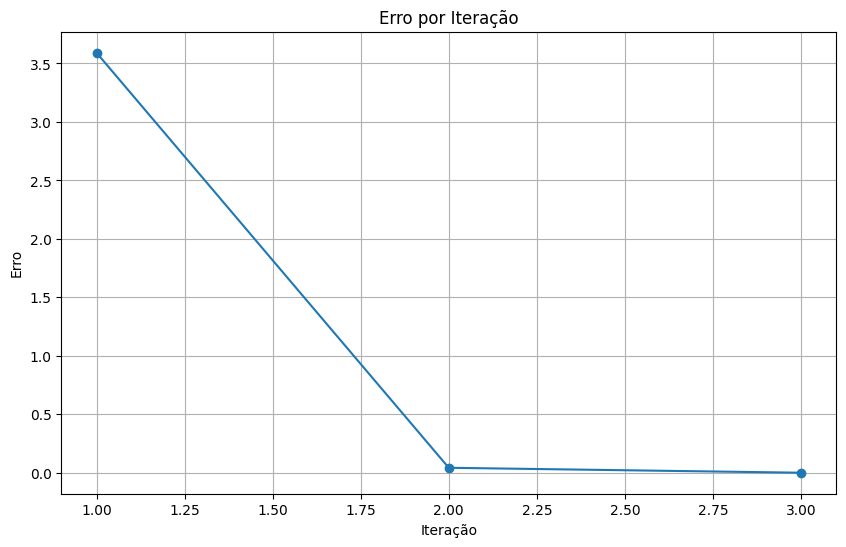


A altura aproximada de impacto é 6.547183663998289


In [16]:
x_aprox = newton_sis(F, Jac,[3,3],0.001)
print('\nA altura aproximada de impacto é', x_aprox[1])

Como podemos ver, ambos os métodos, com tolerância de 0,001 e máximo de 5 iterações para a biseção e 1000 para o de newton, chegaram a uma resposta, mas o método de newton chegou a resposta muito mais rapidamente, precisando de apenas 3 iterações, enquanto que o método da biseção precisou de todas as 5

Como vimos em sala, embora seja muito simples de implementar, o método da biseção avança a aproximação em casas na ordem de log 2, o que torna ele consideravelmente lento quando queremos uma precisão maior, enquanto que o método de newton praticamente dobra o número de casas de precisão a cada iteração, tornando-o muito mais eficaz, como vimos acima.